# Customer Personality Analysis

## Importing the dataset

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("The amount of datapoints is", len(data))
data.head()

The amount of datapoints is 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [106]:
# Summary of customer data
data_Transpose = data.describe()
data_Transpose.T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [107]:
print("The dimension of dataset is", data.shape)

The dimension of dataset is (2240, 29)


In [108]:
# Data observations
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp2,2
Complain,2
AcceptedCmp1,2
AcceptedCmp5,2
Kidhome,3


### Data Engineering
#### 1) Data Cleaning

In [109]:
# Information relating to every feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Categorical data for Education, Marital_Status
Dt_Customer is not date actually because it's type is called "object"

In [110]:
print(data["Dt_Customer"])

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object


In [111]:
# Convert "Dt_Customers" to data-type
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates_array = []
for date in data["Dt_Customer"]:
    date = date.date()
    dates_array.append(date) 

In [112]:
data["Dt_Customer"]

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [113]:
# Check on "Marital_Status" categorial features (8 different types)
data["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [114]:
# Re-encode by grouping categorial features (Split into 2 groups, "Single", "Relationship")
# There are too many maritial status, which might affects the efficiency of classification algorithms.
data["Marital_Status"] = data["Marital_Status"].replace({"Married": "Relationship", "Together": 
"Relationship", "Single": "Single", "Divorced": "Single", "Widow": "Single", "Alone": "Single", "Absurd": "Single", "YOLO": "Single"})
data.Marital_Status.value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [115]:
# Check on "Education" categorial features (5 different types)
data["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [116]:
# Re-encode by grouping categorial features 
data["Education"] = data["Education"].replace({"Graduation": "Undergraduate", 
"PhD": "Postgraduate", "Master": "Postgraduate", "2n Cycle": "Postgraduate", "Basic": "Undergraduate"})

In [117]:
data["Education"].value_counts()

Undergraduate    1181
Postgraduate     1059
Name: Education, dtype: int64

In [118]:
# Check our data
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Undergraduate,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Undergraduate,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Undergraduate,Relationship,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Undergraduate,Relationship,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Postgraduate,Relationship,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Undergraduate,Single,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,Postgraduate,Relationship,33454.0,1,0,2013-08-05,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,Postgraduate,Relationship,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,Postgraduate,Relationship,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [119]:
 # "Z_CostContact" and "Z_Revenue" have only one repating value.
data["Z_CostContact"].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [120]:
data["Z_Revenue"].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [121]:
data["Complain"].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

#### 2. Features Engineering

In [122]:
# Age of customer today
data["Age"] = 2022-data["Year_Birth"]

# Total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

# Number of days when customer start shopping

# Total amount of spent by cusomter on various items
data["Total_Spend"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] 
+ data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Total purchases from different channels
data["Total_Purchases"] = data["NumStorePurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"]

# Total promotions accepted
data["Total_Accepted_Offers"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data["Response"]

In [123]:
# Number of relative days the cutomer is engaged with the company
earliest_customer = data['Dt_Customer'].max()
data['Engaged_Days'] = data['Dt_Customer'].apply(lambda x: (earliest_customer - x).days)
data['Engaged_Days']

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Engaged_Days, Length: 2240, dtype: int64

In [124]:
data["Total_Accepted_Offers"].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: Total_Accepted_Offers, dtype: int64

Issues found: Missing income value (2216/2240)

In [125]:
# Check for NULL
data.isnull().sum()

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Age                       0
Children                  0
Total_Spend               0
Total_Purchases           0
Total_Accepted_Offers     0
Engaged_Days              0
dtype: int64

In [126]:
# Replace NULL with zero 
data['Income'].fillna(0, inplace = True)

In [127]:
# Check for NULL again
data.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
Children                 0
Total_Spend              0
Total_Purchases          0
Total_Accepted_Offers    0
Engaged_Days             0
dtype: int64

In [128]:
# Drop the redudant features
to_drop = ["Dt_Customer","Z_CostContact", "Z_Revenue", "Year_Birth", "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
"MntGoldProds","Kidhome","Teenhome","AcceptedCmp1","AcceptedCmp2", "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "Response", "ID"]
data = data.drop(to_drop, axis=1)

In [129]:
# Drop further features
to_drop = ["Complain"]
data = data.drop(to_drop, axis=1)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2240 non-null   object 
 1   Marital_Status         2240 non-null   object 
 2   Income                 2240 non-null   float64
 3   Recency                2240 non-null   int64  
 4   NumDealsPurchases      2240 non-null   int64  
 5   NumWebPurchases        2240 non-null   int64  
 6   NumCatalogPurchases    2240 non-null   int64  
 7   NumStorePurchases      2240 non-null   int64  
 8   NumWebVisitsMonth      2240 non-null   int64  
 9   Age                    2240 non-null   int64  
 10  Children               2240 non-null   int64  
 11  Total_Spend            2240 non-null   int64  
 12  Total_Purchases        2240 non-null   int64  
 13  Total_Accepted_Offers  2240 non-null   int64  
 14  Engaged_Days           2240 non-null   int64  
dtypes: f

### Data Preprocessing
#### 1. Label Encoding of categorial features

In [131]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [132]:
cat_indicator = (data.dtypes == "object")
cat_cols = list(cat_indicator[cat_indicator].index)
# Our categorial features
cat_cols

['Education', 'Marital_Status']

In [133]:
# Encoding categorial features
Encoder = LabelEncoder()
for feature in cat_cols:
  data[feature] = data[[feature]].apply(Encoder.fit_transform)

In [134]:
# Now every feature is numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2240 non-null   int32  
 1   Marital_Status         2240 non-null   int32  
 2   Income                 2240 non-null   float64
 3   Recency                2240 non-null   int64  
 4   NumDealsPurchases      2240 non-null   int64  
 5   NumWebPurchases        2240 non-null   int64  
 6   NumCatalogPurchases    2240 non-null   int64  
 7   NumStorePurchases      2240 non-null   int64  
 8   NumWebVisitsMonth      2240 non-null   int64  
 9   Age                    2240 non-null   int64  
 10  Children               2240 non-null   int64  
 11  Total_Spend            2240 non-null   int64  
 12  Total_Purchases        2240 non-null   int64  
 13  Total_Accepted_Offers  2240 non-null   int64  
 14  Engaged_Days           2240 non-null   int64  
dtypes: f

In [135]:
data.describe()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Total_Spend,Total_Purchases,Total_Accepted_Offers,Engaged_Days
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.527232,0.355357,51687.459375,49.109375,2.325000,4.084821,2.662054,5.790179,5.316518,53.194196,0.950446,497.187946,12.537054,0.446875,512.043304
std,0.499369,0.478728,25609.342730,28.962453,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069,0.751803,521.064882,7.205741,0.890543,232.229893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,34722.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,45.000000,0.000000,42.000000,6.000000,0.000000,340.750000
50%,1.000000,0.000000,51075.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,52.000000,1.000000,295.000000,12.000000,0.000000,513.000000
75%,1.000000,1.000000,68289.750000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,63.000000,1.000000,851.250000,18.000000,1.000000,685.250000
max,1.000000,1.000000,666666.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,129.000000,3.000000,2246.000000,32.000000,5.000000,1063.000000


#### 2. Dealing with outliers
It seems that max age of 128 years and max income of 666666 are something indicating an existence of the outliers. 
We can look at our data with a broader view.

Text(0.5, 1.0, '"Age" feature Box-plot')

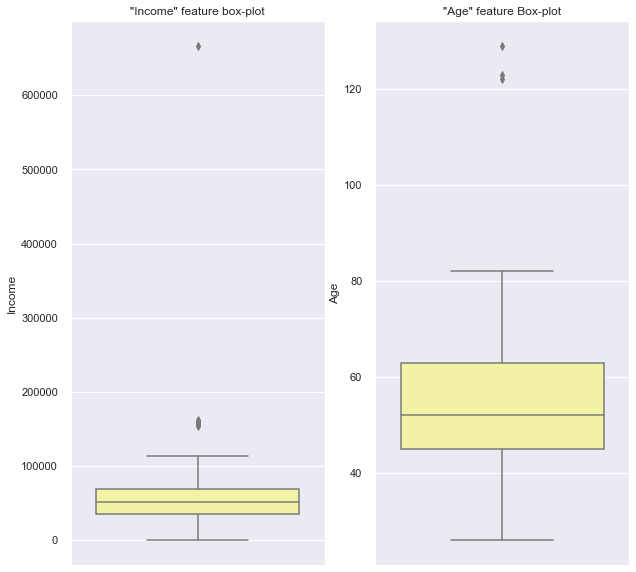

In [136]:
plt.figure(figsize = (10,10))

plt.subplot(1, 2, 1)
sns.boxplot(y = data.Income, palette="terrain_r")
plt.title("\"Income\" feature box-plot")

plt.subplot(1, 2, 2)
sns.boxplot(y = data.Age, palette="terrain_r")
plt.title("\"Age\" feature Box-plot")

In [137]:
# Let's define a funtion to find interquantile range borders
def find_IQR(data, column):
    q_25, q_75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    IQR = q_75 - q_25
    whiskers_range = IQR * 1.5
    lower, upper = q_25 - whiskers_range, whiskers_range + q_75
    return lower, upper

In [138]:
# Find LQ and UQ for Income
lower_income, upper_income = find_IQR(data, "Income")
print(lower_income, upper_income)

-15629.625 118641.375


In [139]:
# Find LQ and UQ for Age
lower_age, upper_age = find_IQR(data, "Age")
print(lower_age, upper_age)

18.0 90.0


In [140]:
# Drop the outliers
data = data[(data["Age"] < upper_age)]
data = data[(data["Income"] < upper_income)]

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2229 non-null   int32  
 1   Marital_Status         2229 non-null   int32  
 2   Income                 2229 non-null   float64
 3   Recency                2229 non-null   int64  
 4   NumDealsPurchases      2229 non-null   int64  
 5   NumWebPurchases        2229 non-null   int64  
 6   NumCatalogPurchases    2229 non-null   int64  
 7   NumStorePurchases      2229 non-null   int64  
 8   NumWebVisitsMonth      2229 non-null   int64  
 9   Age                    2229 non-null   int64  
 10  Children               2229 non-null   int64  
 11  Total_Spend            2229 non-null   int64  
 12  Total_Purchases        2229 non-null   int64  
 13  Total_Accepted_Offers  2229 non-null   int64  
 14  Engaged_Days           2229 non-null   int64  
dtypes: f

#### 3. Scaling the data

In [142]:
# Scale the data
Scaler = StandardScaler()
Scaler.fit(data)
data_scaled = pd.DataFrame(Scaler.transform(data), columns= data.columns)
data_scaled.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Total_Spend,Total_Purchases,Total_Accepted_Offers,Engaged_Days
0,0.944558,1.345676,0.332405,0.307314,0.358938,1.405471,2.633984,-0.559160,0.689920,1.015715,-1.266277,1.487083,1.316246,0.618155,1.976013
1,0.944558,1.345676,-0.221969,-0.383771,-0.168815,-1.117198,-0.585437,-1.176175,-0.138430,1.272020,1.393978,-0.921512,-1.190657,-0.502974,-1.666837
2,0.944558,-0.743121,0.965793,-0.798422,-0.696567,1.405471,-0.227723,1.291882,-0.552605,0.332234,-1.266277,0.202884,1.037701,-0.502974,-0.172666
3,0.944558,-0.743121,-1.147868,-0.798422,-0.168815,-0.756817,-0.943150,-0.559160,0.275745,-1.291031,0.063851,-0.888781,-0.912112,-0.502974,-1.925195
4,-1.058696,-0.743121,0.339690,1.551268,1.414444,0.324327,0.129990,0.057854,-0.138430,-1.034726,0.063851,-0.313106,0.202067,-0.502974,-0.822867


<AxesSubplot:>

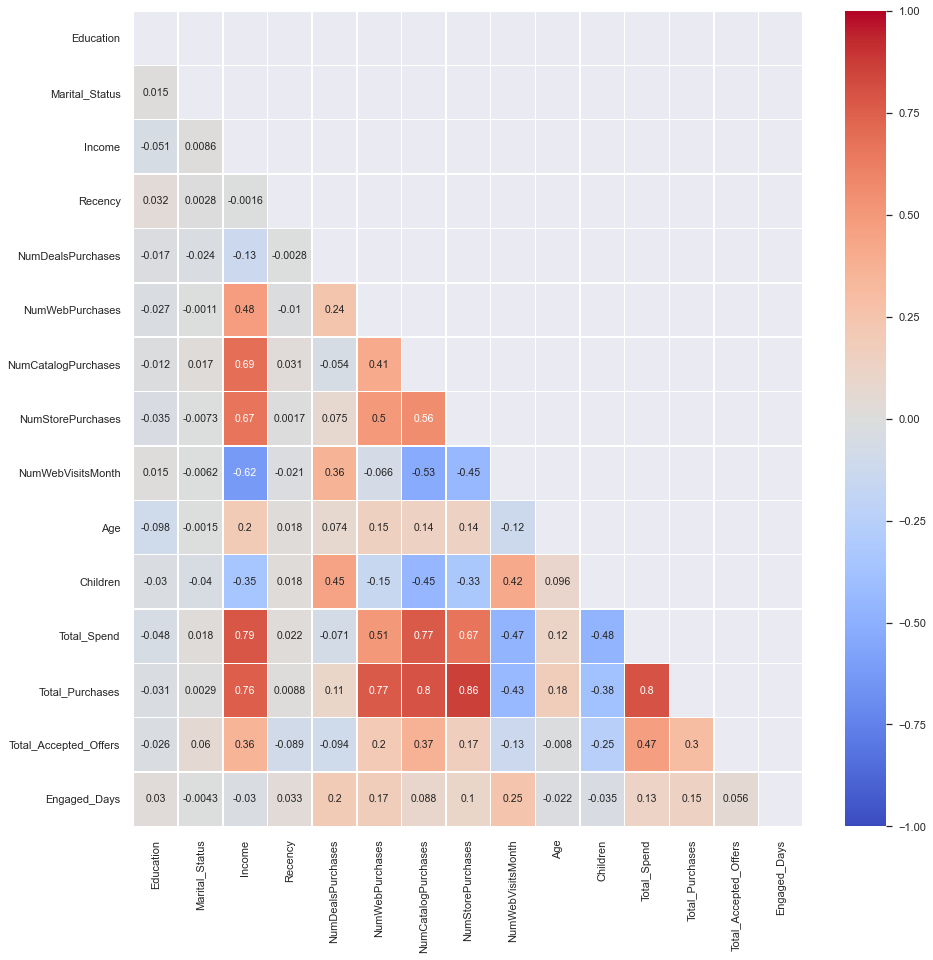

In [143]:
#correlation matrix
matrix = np.triu(data_scaled.corr())
plt.figure(figsize=(15,15)) 
sns.heatmap(data_scaled.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot=True,annot_kws={"size": 10.5},linewidths=.5, mask=matrix)

### Dimensionality reduction, PCA

There are lots of feature but it's a bad decision to take a lot of features because of the correlations between them (see correlation matrix done earlier on) - information taken from correlated factors is redundant, so that we need nearly independent ones. Dimensionality reduction techniques can help us to deal with these problems.

Principal Component Analysis (PCA) - is one of such techniques. It will help us to minimize the information loss and increase the possibility of data to be interpreted better. Before start, the amount of principal vectors should be chosen - I will choose the amount of 3, because I want to have opportunity to visualize the data and save as much information as I can at the same time

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data_scaled)
principal_data = pd.DataFrame(pca.transform(data_scaled), columns=(["PC1","PC2", "PC3"]))
principal_data.head()
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.34308369 0.12410026 0.08286327]


In [145]:
# Define vector comtaining coordinates (row = object)
x = principal_data['PC1']
y = principal_data['PC2']
z = principal_data['PC3']

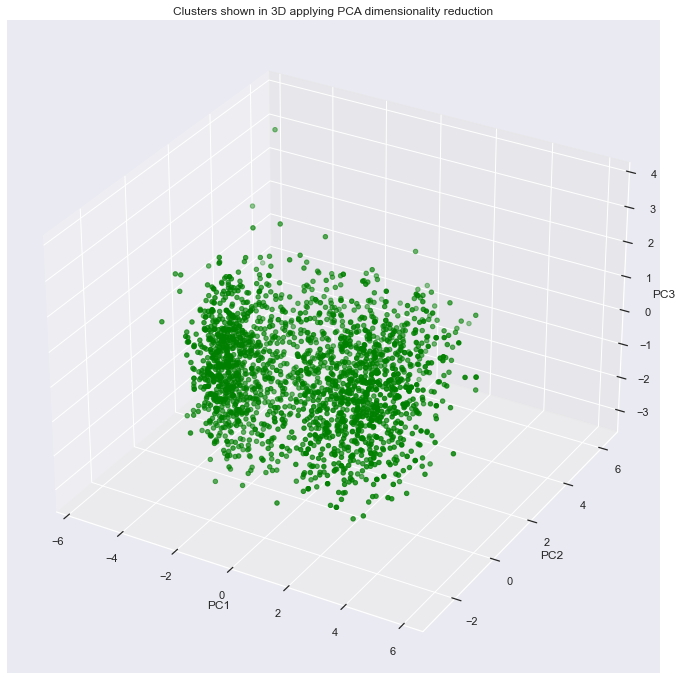

In [146]:
# Plot data
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x, y, z, c='green', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("Clusters shown in 3D applying PCA dimensionality reduction")
plt.show()

### Clustering
We don't know the true distribution of target variable so that we can relate the task to "Unsupervised Clustering" 
- our model will need to find the relations in data. The main problem is that we don't
know the amount of clusters and to specify it three methods will be used: 
"Elbow method", "Silhouette method", "DB Index"

### Elbow method for K-Means

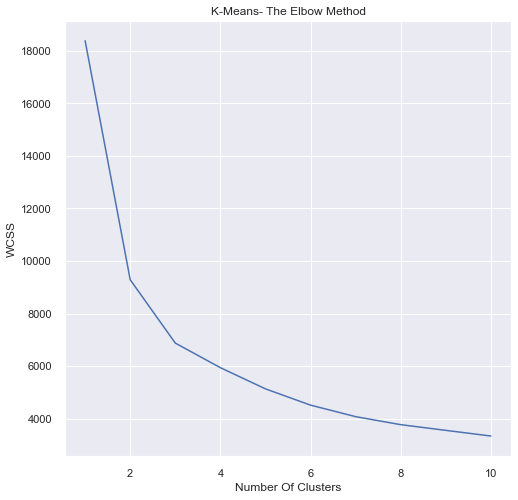

In [147]:
# Use elbow method to find optimal number of clusters for K-Means
from sklearn.cluster import KMeans
wcss = []   # save results in this empty list
for i in range(1,11):   # run this from 1 to 10 times
    kmeans = KMeans(n_clusters = i,
    init = 'k-means++', max_iter = 500, n_init = 10)
    kmeans.fit(principal_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,8))
plt.plot(range(1,11), wcss,'bx-')
plt.title("K-Means- The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [148]:
# Using KneeLocator to find the optimal k value
!pip install kneed
from kneed import KneeLocator
wcss_knee = KneeLocator(
        x=range(1,11), 
        y=wcss, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_wcss= wcss_knee.elbow   
print("elbow at k =", f'{K_wcss:.0f} clusters')

elbow at k = 3 clusters


### Silhouette method for K-Means

In [149]:
!pip install yellowbrick

In [150]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster.silhouette import SilhouetteVisualizer

Silhouetter Score: for 2 clusters is 0.4374305014656591
Silhouetter Score: for 3 clusters is 0.38237763253157875
Silhouetter Score: for 4 clusters is 0.2979589371036801
Silhouetter Score: for 5 clusters is 0.28546151330353964


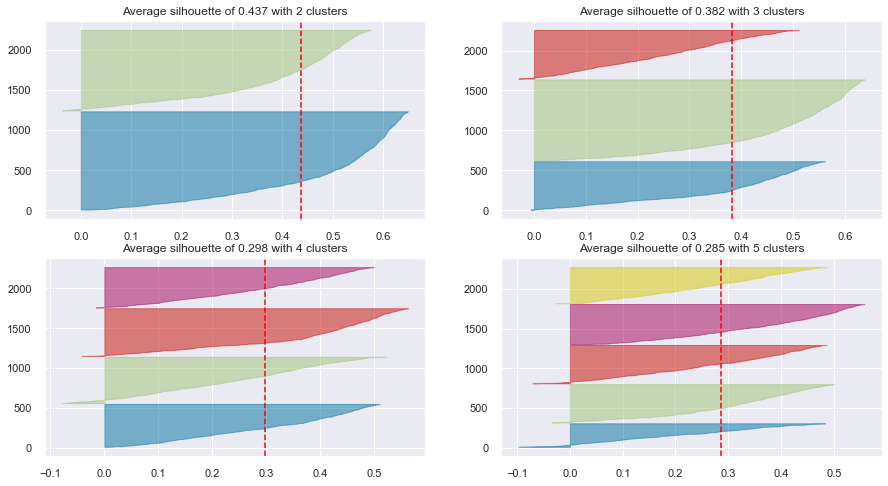

In [151]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
ax[0, 0].set_title('Average silhouette of 0.437 with 2 clusters')
ax[0, 1].set_title('Average silhouette of 0.382 with 3 clusters')
ax[1, 0].set_title('Average silhouette of 0.298 with 4 clusters')
ax[1, 1].set_title('Average silhouette of 0.285 with 5 clusters')
for i in [2, 3, 4, 5]:
    '''Create KMeans instance for different number of clusters'''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=1000, random_state=42)
    q, mod = divmod(i, 2)
    '''Create SilhouetteVisualizer instance with KMeans instance Fit the visualizer'''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(principal_data)
    km.fit_predict(principal_data)
    # Calculate Silhoutte Score
    score = silhouette_score(principal_data, km.labels_, metric='euclidean')
    print(f'Silhouetter Score: for {i} clusters is {score}')

### DB index for K-Means

In [152]:
# 2 clusters
kmeans = KMeans(n_clusters=2, random_state=1).fit(principal_data)
# we store the cluster labels
labels = kmeans.labels_
print(davies_bouldin_score(principal_data,labels))

0.9281077380066831


In [153]:
labels

array([1, 0, 1, ..., 1, 1, 0])

In [154]:
principal_data["Clusters"] = labels
principal_data

,PC1,PC2,PC3,Clusters
0,2.817682,1.371357,1.867801,1
1,-2.237775,-0.909053,-1.563888,0
2,2.015664,-0.245205,-0.097014,1
3,-2.326175,-1.283605,0.054574,0
4,0.012648,0.661568,-0.804297,0
...,...,...,...,...
2224,0.977146,0.615302,0.067039,1
2225,-0.166059,2.922258,-3.157395,0
2226,1.819600,-1.205007,1.138850,1
2227,2.143591,0.083154,-1.959843,1


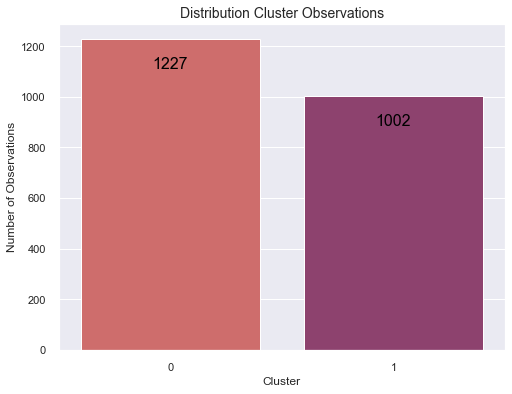

In [155]:
# distribution of clusters : are they fairly distributed ?
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
principal_data["Clusters"] = labels
plt.figure(figsize=(8,6))
count_plot = sns.countplot(x=principal_data["Clusters"], palette="flare")
count_plot.set_title("Distribution Cluster Observations", fontsize=14)
for p in count_plot.patches:
    count_plot.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=16)
plt.xlabel("Cluster")
plt.ylabel("Number of Observations")
plt.show()

In [159]:
data["Clusters"] = labels
data.groupby(['Clusters']).mean().T

Clusters,0,1
Education,0.536267,0.518962
Marital_Status,0.344743,0.369261
Income,35973.216789,69548.485030
Recency,48.875306,49.389222
NumDealsPurchases,2.443358,2.168663
NumWebPurchases,2.661777,5.861277
NumCatalogPurchases,0.750611,4.946108
NumStorePurchases,3.615322,8.502994
NumWebVisitsMonth,6.497963,3.909182
Age,51.286879,55.345309


### Agglomerative Clustering model - one of the Hierarchical Clustering models

In [92]:
features = ['PC1','PC2','PC3']
x = principal_data[features]
x.head()

,PC1,PC2,PC3
0,2.817682,1.371357,1.867802
1,-2.237775,-0.909053,-1.563887
2,2.015664,-0.245206,-0.097022
3,-2.326175,-1.283603,0.054581
4,0.012648,0.661565,-0.804309


In [93]:
principal_data.head()

,PC1,PC2,PC3,Clusters
0,2.817682,1.371357,1.867802,1
1,-2.237775,-0.909053,-1.563887,0
2,2.015664,-0.245206,-0.097022,1
3,-2.326175,-1.283603,0.054581,0
4,0.012648,0.661565,-0.804309,0


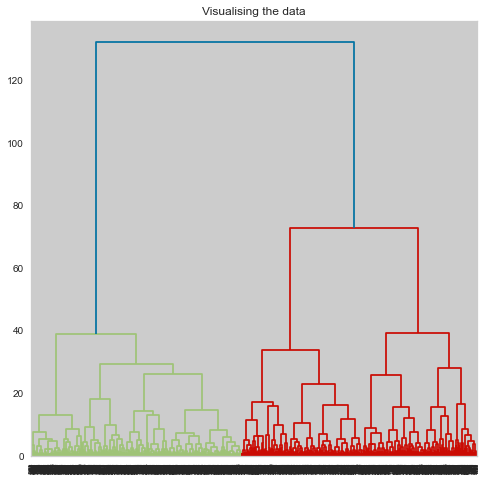

In [94]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
dendro = sch.dendrogram(sch.linkage(principal_data,method = 'ward'))

### Silhouette Score - Agglomerative

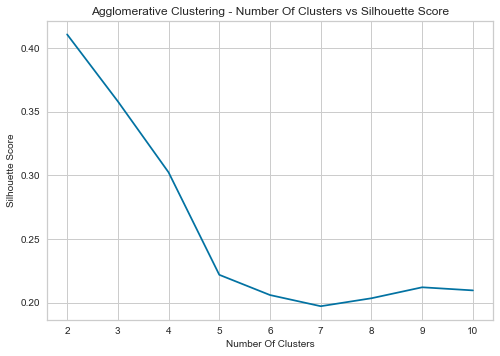

[0.410589920680526, 0.35801231201582884, 0.3022581348088741, 0.22178165248462345, 0.20589506794877488, 0.19712355983026827, 0.20337805221272182, 0.21198388278581104, 0.20954443747461915]


In [96]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
silhouette_scores = [] 
for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(principal_data, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(principal_data)))
#plot a graph to compare the results
plt.plot(range(2,11),silhouette_scores )
plt.title("")
plt.xlabel("Number Of Clusters", fontsize = 10)
plt.ylabel("Silhouette Score", fontsize = 10)
plt.title('Agglomerative Clustering - Number Of Clusters vs Silhouette Score') 
plt.show()
print(silhouette_scores)

In [97]:
# 2 clusters
from sklearn.cluster import AgglomerativeClustering
# init the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=2)
# fit our data and make prediction
y_pred = AC.fit_predict(principal_data)
principal_data["Clusters"] = y_pred
# also let's add the feature to original data
data["Clusters"] = y_pred
principal_data.head()

,PC1,PC2,PC3,Clusters
0,2.817682,1.371357,1.867802,0
1,-2.237775,-0.909053,-1.563887,1
2,2.015664,-0.245206,-0.097022,0
3,-2.326175,-1.283603,0.054581,1
4,0.012648,0.661565,-0.804309,1


### DB Index - Agglomerative

In [98]:
# 2 clusters
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

print(davies_bouldin_score(principal_data,y_pred))

0.9446522044923841


## DBSCAN Clustering


In [99]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
import csv
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()
data_scaled.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Total_Spend,Total_Purchases,Total_Accepted_Offers,Engaged_Days
0,0.944558,1.345676,0.332405,0.307314,0.358938,1.405471,2.633984,-0.559160,0.689920,1.015715,-1.266277,1.487083,1.316246,0.618155,1.976013
1,0.944558,1.345676,-0.221969,-0.383771,-0.168815,-1.117198,-0.585437,-1.176175,-0.138430,1.272020,1.393978,-0.921512,-1.190657,-0.502974,-1.666837
2,0.944558,-0.743121,0.965793,-0.798422,-0.696567,1.405471,-0.227723,1.291882,-0.552605,0.332234,-1.266277,0.202884,1.037701,-0.502974,-0.172666
3,0.944558,-0.743121,-1.147868,-0.798422,-0.168815,-0.756817,-0.943150,-0.559160,0.275745,-1.291031,0.063851,-0.888781,-0.912112,-0.502974,-1.925195
4,-1.058696,-0.743121,0.339690,1.551268,1.414444,0.324327,0.129990,0.057854,-0.138430,-1.034726,0.063851,-0.313106,0.202067,-0.502974,-0.822867


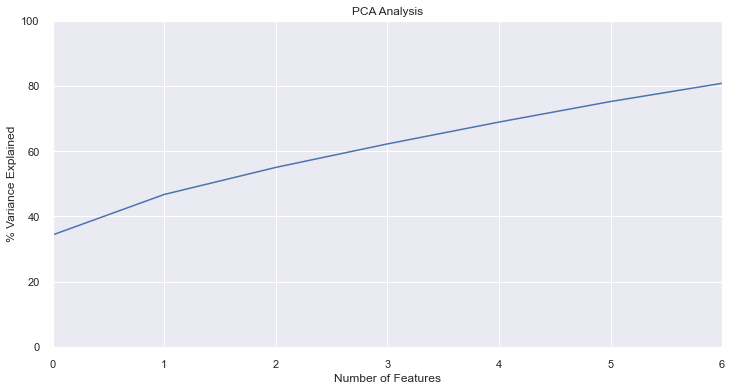

In [100]:
pca = PCA(n_components=10)
pca.fit(data_scaled)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(0,100,10)
plt.xlim(0,6)
plt.plot(var)

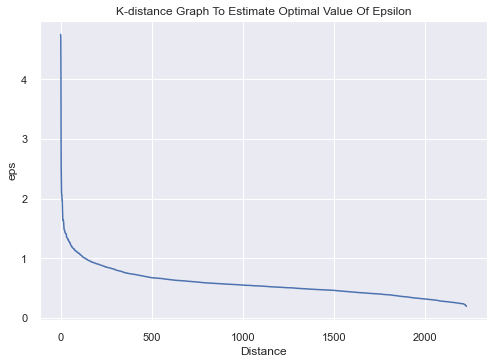

In [101]:
#selection of eps value       
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(principal_data)
distances, indices = nbrs.kneighbors(principal_data,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.title('K-distance Graph To Estimate Optimal Value Of Epsilon')
plt.show()

Choosing eps parameter using the K-distance graph:
We used the below k distance graph from sklearn to find the optimal value of eps, which was found to be 1.5 (also from model iterations) and chose min_samples to be 4 according to the criteria that min_samples >= D+1 where D is the dimensions of the data (Ren, 2019) (here, we had 3 numerical variables).

In [102]:
#DBSCAN Algorithm
from sklearn.cluster import DBSCAN
dbs_1= DBSCAN(eps=1.5, min_samples=4)
results = dbs_1.fit(principal_data).labels_

 0    2222
-1       7
Name: Cluster_id_DBSCAN, dtype: int64


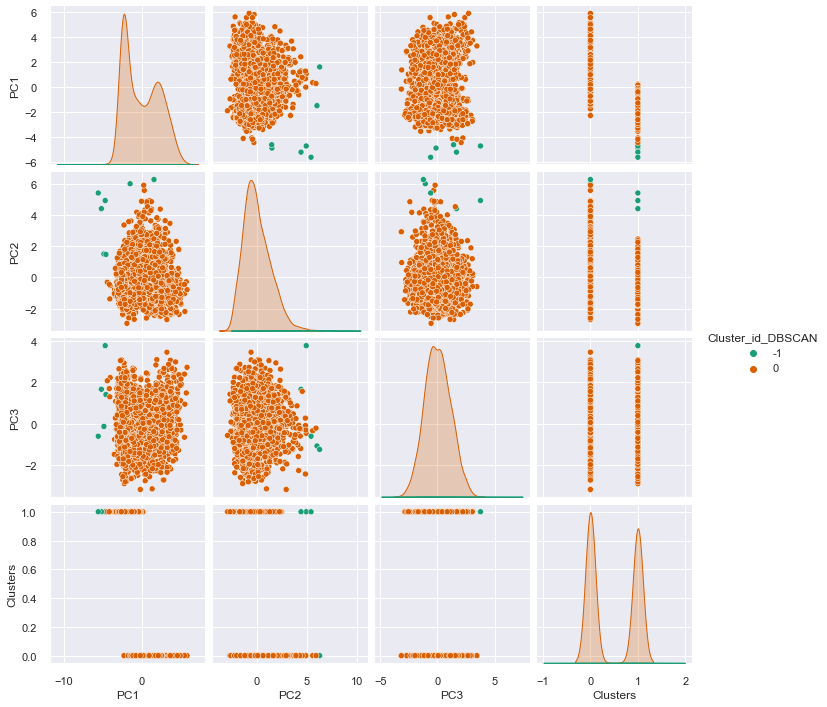

In [103]:
#Visualize DBSCAN clustering 
df_DBSCAN=principal_data
df_DBSCAN['Cluster_id_DBSCAN']=results
print (df_DBSCAN['Cluster_id_DBSCAN'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster_id_DBSCAN',palette='Dark2',diag_kind='kde')

In [104]:
# Applying DBSCAN shows only 1 cluster is found (-1 being the cluster for noise)
dbscancluster = DBSCAN(eps = 1.5, min_samples = 4)
labels = dbscancluster.fit_predict(principal_data)
np.unique(labels)

array([-1,  0], dtype=int64)

## K-Prototypes

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("The amount of datapoints is", len(data))
data.head()

The amount of datapoints is 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [161]:
# Convert "Dt_Customers" to data-type
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates_array = []
for date in data["Dt_Customer"]:
    date = date.date()
    dates_array.append(date) 

In [162]:
# Re-encode by grouping categorial features (Split into 2 groups, "Alone", "Not Alone")
data["Marital_Status"] = data["Marital_Status"].replace({"Married": "Relationship", "Together": 
"Relationship", "Single": "Single", "Divorced": "Single", "Widow": "Single", "Alone": "Single", "Absurd": "Single", "YOLO": "Single"})
data.Marital_Status.value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [163]:
# Re-encode by grouping categorial features (Split into 2 groups, "UG", "PG")
data["Education"] = data["Education"].replace({"Graduation": "Undergraduate", 
"PhD": "Postgraduate", "Master": "Postgraduate", "2n Cycle": "Postgraduate", "Basic": "Undergraduate"})
data.Education.value_counts()

Undergraduate    1181
Postgraduate     1059
Name: Education, dtype: int64

In [164]:
# Age of customer today
data["Age"] = 2022-data["Year_Birth"]

# Total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

# Number of days when customer start shopping

# Total amount of spent by cusomter on various items
data["Total_Spend"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] 
+ data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Total purchases from different channels
data["Total_Purchases"] = data["NumStorePurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"]

# Total promotions accepted
data["Total_Accepted_Offers"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data["Response"]

In [165]:
# Number of relative days the cutomer is engaged with the company
earliest_customer = data['Dt_Customer'].max()
data['Engaged_Days'] = data['Dt_Customer'].apply(lambda x: (earliest_customer - x).days)
data['Engaged_Days']

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Engaged_Days, Length: 2240, dtype: int64

In [166]:
# Replace NULL with zero 
data['Income'].fillna(0, inplace = True)

In [167]:
to_drop = ["Complain", "Dt_Customer","Z_CostContact", "Z_Revenue", "Year_Birth", "MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
"MntGoldProds","Kidhome","Teenhome","AcceptedCmp1","AcceptedCmp2", "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "Response", "ID"]
data = data.drop(to_drop, axis=1)

Text(0.5, 1.0, '"Age" Box-plot')

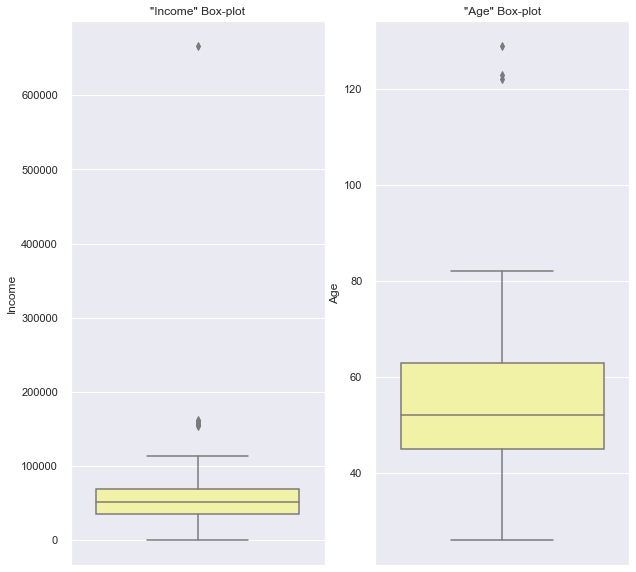

In [168]:
plt.figure(figsize = (10,10))

plt.subplot(1, 2, 1)
sns.boxplot(y = data.Income, palette="terrain_r")
plt.title("\"Income\" Box-plot")

plt.subplot(1, 2, 2)
sns.boxplot(y = data.Age, palette="terrain_r")
plt.title("\"Age\" Box-plot")

In [169]:
# Let's define a funtion to find interquantile range borders
def find_IQR(data, column):
    q_25, q_75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    IQR = q_75 - q_25
    whiskers_range = IQR * 1.5
    lower, upper = q_25 - whiskers_range, whiskers_range + q_75
    return lower, upper

In [170]:
# Find LQ and UQ for Income
lower_income, upper_income = find_IQR(data, "Income")
print(lower_income, upper_income)

-15629.625 118641.375


In [171]:
# Find LQ and UQ for Age
lower_age, upper_age = find_IQR(data, "Age")
print(lower_age, upper_age)

18.0 90.0


In [172]:
# Drop the outliers
data = data[(data["Age"] < upper_age)]
data = data[(data["Income"] < upper_income)]

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2229 non-null   object 
 1   Marital_Status         2229 non-null   object 
 2   Income                 2229 non-null   float64
 3   Recency                2229 non-null   int64  
 4   NumDealsPurchases      2229 non-null   int64  
 5   NumWebPurchases        2229 non-null   int64  
 6   NumCatalogPurchases    2229 non-null   int64  
 7   NumStorePurchases      2229 non-null   int64  
 8   NumWebVisitsMonth      2229 non-null   int64  
 9   Age                    2229 non-null   int64  
 10  Children               2229 non-null   int64  
 11  Total_Spend            2229 non-null   int64  
 12  Total_Purchases        2229 non-null   int64  
 13  Total_Accepted_Offers  2229 non-null   int64  
 14  Engaged_Days           2229 non-null   int64  
dtypes: f

In [174]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
dfMatrix = data.to_numpy()

In [175]:
# getting categorical columns and their indices.
catColumnsPos = [data.columns.get_loc(col) for col in list(data.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(data.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Education', 'Marital_Status']
Categorical columns position  : [0, 1]


In [176]:
cat_indicator = (data.dtypes == "object")
cat_cols = list(cat_indicator[cat_indicator].index)
# Our categorial features
cat_cols

['Education', 'Marital_Status']

In [177]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# Encoding categorial features
Encoder = LabelEncoder()
for feature in cat_cols:
  data[feature] = data[[feature]].apply(Encoder.fit_transform)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2229 non-null   int32  
 1   Marital_Status         2229 non-null   int32  
 2   Income                 2229 non-null   float64
 3   Recency                2229 non-null   int64  
 4   NumDealsPurchases      2229 non-null   int64  
 5   NumWebPurchases        2229 non-null   int64  
 6   NumCatalogPurchases    2229 non-null   int64  
 7   NumStorePurchases      2229 non-null   int64  
 8   NumWebVisitsMonth      2229 non-null   int64  
 9   Age                    2229 non-null   int64  
 10  Children               2229 non-null   int64  
 11  Total_Spend            2229 non-null   int64  
 12  Total_Purchases        2229 non-null   int64  
 13  Total_Accepted_Offers  2229 non-null   int64  
 14  Engaged_Days           2229 non-null   int64  
dtypes: f

In [179]:
# select columns to cluster
cluster_columns = ['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases'
                   ,'NumWebVisitsMonth','Age','Children','Total_Spend','Total_Purchases','Total_Accepted_Offers','Engaged_Days']
data = data[cluster_columns]

In [180]:
from sklearn.preprocessing import StandardScaler
# define numerical and categorical columns
numerical_columns = ['Income', 'Recency', 'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases'
                   ,'NumWebVisitsMonth','Age','Children','Total_Spend','Total_Purchases','Total_Accepted_Offers','Engaged_Days']
categorical_columns = ['Education', 'Marital_Status']
scaler = StandardScaler()
# create a copy of our data to be scaled
df_scale = data.copy()
# standard scale numerical features
for c in numerical_columns:
    df_scale[c] = scaler.fit_transform(data[[c]])

In [181]:
from kmodes.kprototypes import KPrototypes
categorical_indexes = []
for c in categorical_columns:
    categorical_indexes.append(data.columns.get_loc(c))
categorical_indexes

[0, 1]

### The Elbow Method 
This method calculates the total cluster variance (cost) for varying numbers of clusters. As we increase the number of clusters we expect the total cluster variance to decrease. 

Text(0, 0.5, 'Cost')

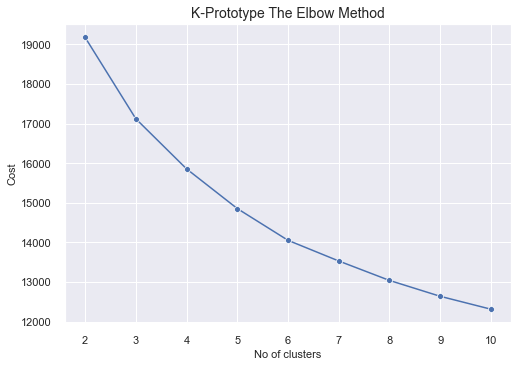

In [182]:
import seaborn as sns
num_clusters = list(range(2, 11))
cost_values = []
# calculate cost values for each number of clusters (2 to 10)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_scale, categorical= categorical_indexes)
    cost_values.append(kproto.cost_)
# plot cost against number of clusters
ax = sns.lineplot(x=num_clusters, y=cost_values, marker="o")
ax.set_title('K-Prototype The Elbow Method', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Cost', fontsize=11)

### The Average Silhouette Method
We plot the average silhouette values for varying levels of clusters and look for the number of clusters that result in the maximum average silhouette value.

[0.2827171366001097, 0.20439793333854453, 0.1999821359062522, 0.13728682019741578, 0.13250471346034598, 0.12390980456563125, 0.11924326071465277, 0.11767071521406554, 0.11588325971250747]


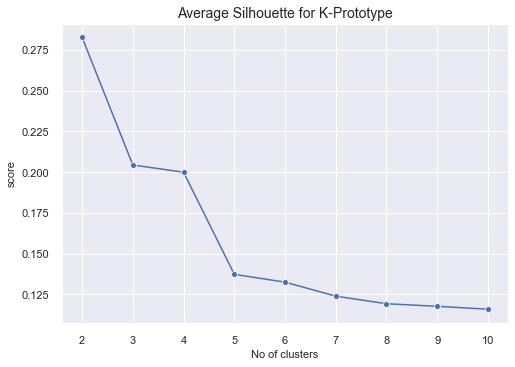

In [184]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
# calculate average silhouette score for each number of cluster (2 to 10)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_scale, categorical= categorical_indexes)
    cluster_labels = kproto.labels_
    silhouette_avg.append(silhouette_score(df_scale, cluster_labels))
# plot average silhouette score against number of clusters
ax = sns.lineplot(x=num_clusters, y=silhouette_avg, marker="o")
ax.set_title('Average Silhouette for K-Prototype', fontsize=13)
ax.set_xlabel('No of clusters', fontsize=10)
ax.set_ylabel('score', fontsize=10)
print(silhouette_avg)

### THE DB index

In [185]:
from sklearn.metrics import davies_bouldin_score
label = kproto.fit_predict(df_scale, categorical = categorical_indexes)
davies_bouldin_score(df_scale, label)

1.9829833449515484

### Elbow method for K-Prototypes

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7


<function matplotlib.pyplot.show(close=None, block=None)>

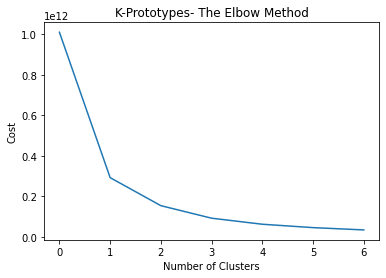

In [17]:
# Clustering
#Elbow method to detect number of K
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 8):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title("K-Prototypes- The Elbow Method")
plt.show

In [118]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
!pip install kneed
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,8), 
        y=cost, 
        S=0.1, curve="convex", direction="decreasing", online=True)
K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 2 clusters


In [20]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
num_clusters = list(range(2, 7))
# calculate average silhouette score for each number of cluster (2 to 6)
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(dfMatrix, categorical= catColumnsPos)
    cluster_labels = kproto.labels_
    silhouette_avg.append(silhouette_score(dfMatrix, cluster_labels))
# plot average silhouette score against number of clusters
ax = sns.lineplot(x=num_clusters, y=silhouette_avg, marker="o")
ax.set_title('Average Silhouette', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('score', fontsize=11)

ValueError: could not convert string to float: 'Undergraduate'

In [119]:
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
data['clusters']= kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)